In [2]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
import string
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = read_csv("train.csv")
test = read_csv("test.csv")
print('Number of Training Samples = {}'.format(train.shape[0]))
#print('Number of Test Samples = {}\n'.format(test.shape[0]))
print('Training X Shape = {}'.format(train.shape))
#print('Training y Shape = {}\n'.format(train['label'].shape[0]))
print('Test X Shape = {}'.format(test.shape))
print('Test y Shape = {}\n'.format(test.shape[0]))
print('Index of Train Set:\n', train.columns)
print('Index of Test Set:\n', test.columns)

Number of Training Samples = 42000
Training X Shape = (42000, 785)
Test X Shape = (28000, 784)
Test y Shape = 28000

Index of Train Set:
 Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index of Test Set:
 Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1 0 4 7 3 5 8 9 2 6]


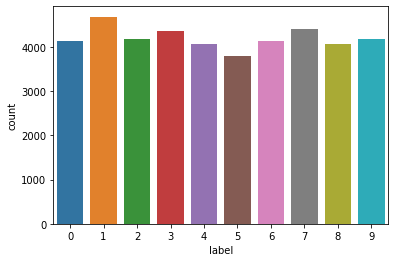

In [5]:
cp=countplot(train['label']) #test for imbalance
print(unique(train['label']))

In [6]:
print(train.isnull().all().any())
print(test.isnull().all().any())

False
False


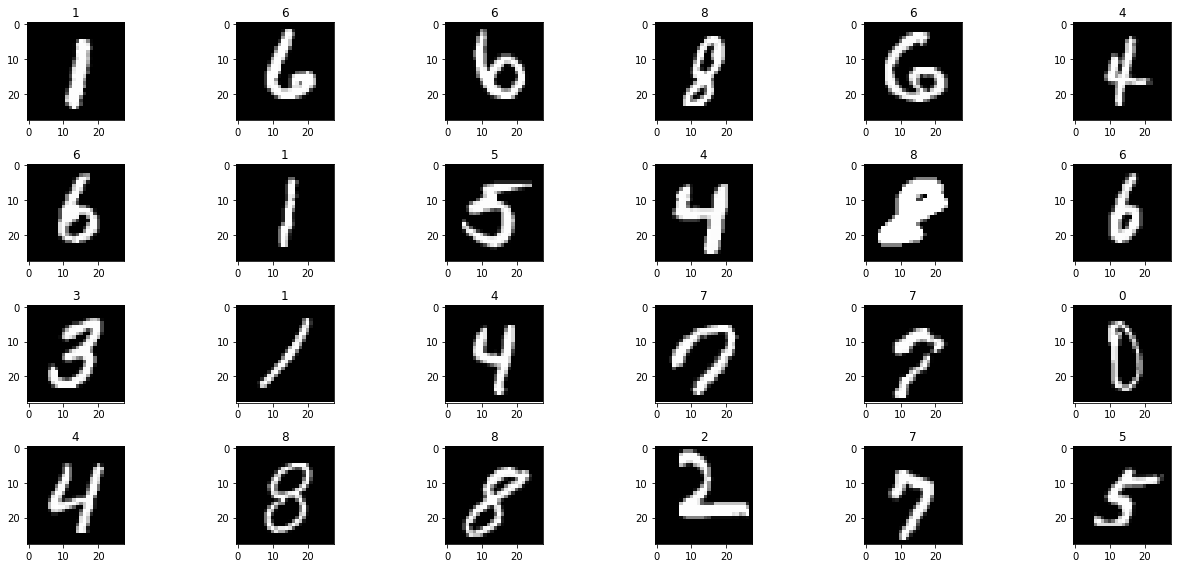

In [7]:
import matplotlib.pyplot as plt
def show_image(train_image, train_label, index):
    image_shaped = train_image.values.reshape(28,28)
    subplot(4, 6, index+1)
    imshow(image_shaped, cmap=plt.cm.gray)
    title(label)


figure(figsize=(18, 8))
sample_image = train.sample(24).reset_index(drop=True)
#print(sample_image)
for index, row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels, label, index)
tight_layout()

In [8]:
#pip install tensorflow

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = train.drop(columns=['label']).values.reshape((train.shape[0],28,28,1))
X_train = X.astype('float32') / 255
y = to_categorical(train['label'])
X_test = test.values.reshape((test.shape[0],28,28,1))
X_test = X_test.astype('float32') / 255

# prepare training and validation sets
train_images, test_images, train_labels, test_labels = train_test_split(X, y,
                                                test_size=0.1, random_state=0)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]
model.compile(optimizer='rmsprop',
   loss='categorical_crossentropy',
   metrics=['acc'])
history = model.fit(train_images,
   train_labels,
   epochs=20,
   batch_size=64,
   callbacks=callbacks,
   validation_data=(test_images, test_labels))

Epoch 1/20
591/591 [==============================] - ETA: 0s - loss: 0.2412 - acc: 0.9278
Epoch 00001: val_loss improved from inf to 0.09659, saving model to model.h5
591/591 [==============================] - 19s 32ms/step - loss: 0.2412 - acc: 0.9278 - val_loss: 0.0966 - val_acc: 0.9700
Epoch 2/20
591/591 [==============================] - ETA: 0s - loss: 0.0700 - acc: 0.9784
Epoch 00002: val_loss improved from 0.09659 to 0.06980, saving model to model.h5
591/591 [==============================] - 18s 30ms/step - loss: 0.0700 - acc: 0.9784 - val_loss: 0.0698 - val_acc: 0.9781
Epoch 3/20
590/591 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9856
Epoch 00003: val_loss improved from 0.06980 to 0.04804, saving model to model.h5
591/591 [==============================] - 18s 30ms/step - loss: 0.0470 - acc: 0.9857 - val_loss: 0.0480 - val_acc: 0.9857
Epoch 4/20
589/591 [============================>.] - ETA: 0s - loss: 0.0355 - acc: 0.9894
Epoch 00004: val_loss did no

In [14]:
predictions = model.predict(X_test)
results = argmax(predictions, axis = 1) 

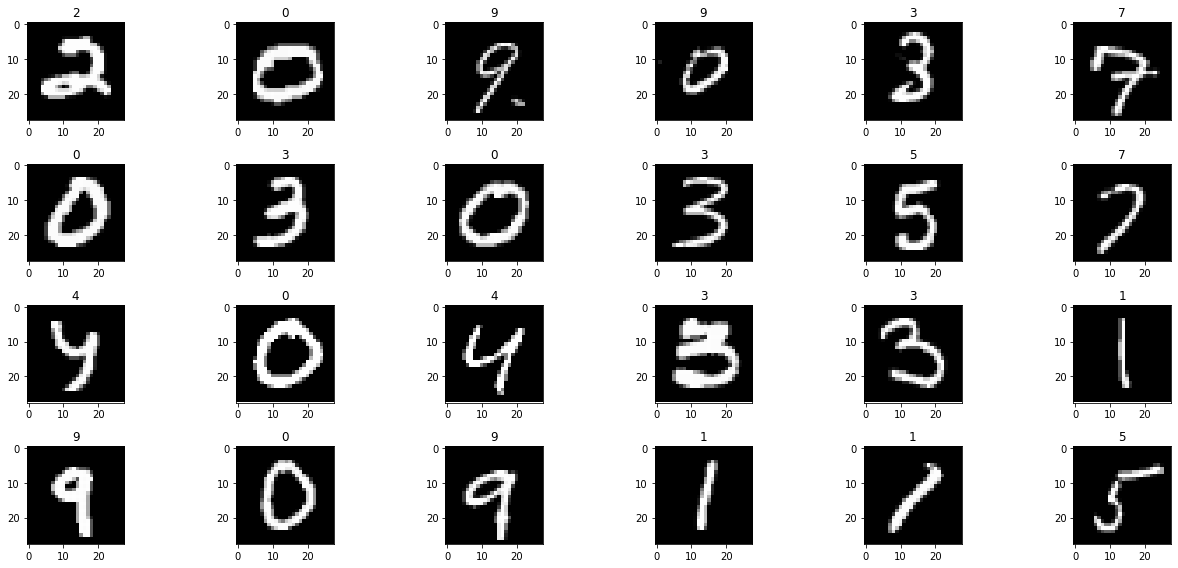

In [15]:
plt.figure(figsize=(18, 8))
sample_test = test.head(24)
for index, image_pixels in sample_test.iterrows():
    label = results[index]
    show_image(image_pixels, label, index)
plt.tight_layout()